<a href="https://colab.research.google.com/github/jhChoi1997/KSNVE-AI-2022-summer/blob/main/code/7_Audio_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2022년 인공지능 강습회 2일차 실습 코드**
## **Practice 7 : Audio Data Preprocessing**

Audio data can be preprocessed in many ways for deep learning. In this session, we will learn how to preprocess audio data using the DCASE 2020 task 2 dataset. 💻

Download data 📁 🎵

In [1]:
!gdown https://drive.google.com/uc?id=18Mm7JjrTstMN7EuV8YBpUEiQX_rV0nYk
!unzip dataset.zip
!mkdir data
!mv ToyCar fan valve data

Downloading...
From: https://drive.google.com/uc?id=18Mm7JjrTstMN7EuV8YBpUEiQX_rV0nYk
To: /content/dataset.zip
100% 5.55M/5.55M [00:00<00:00, 93.4MB/s]
Archive:  dataset.zip
   creating: fan/
  inflating: fan/anomaly_id_00_00000010.wav  
  inflating: fan/anomaly_id_02_00000000.wav  
  inflating: fan/anomaly_id_04_00000012.wav  
  inflating: fan/anomaly_id_06_00000002.wav  
  inflating: fan/normal_id_00_00000007.wav  
  inflating: fan/normal_id_02_00000012.wav  
  inflating: fan/normal_id_04_00000006.wav  
  inflating: fan/normal_id_06_00000015.wav  
   creating: ToyCar/
  inflating: ToyCar/anomaly_id_01_00000019.wav  
  inflating: ToyCar/anomaly_id_02_00000018.wav  
  inflating: ToyCar/anomaly_id_03_00000003.wav  
  inflating: ToyCar/normal_id_01_00000010.wav  
  inflating: ToyCar/normal_id_02_00000013.wav  
  inflating: ToyCar/normal_id_03_00000013.wav  
   creating: valve/
  inflating: valve/anomaly_id_00_00000023.wav  
  inflating: valve/anomaly_id_02_00000016.wav  
  inflating: val

### **1-1. Acoustic feature : Audio Data**

Load audio data. Use `librosa.load` from `librosa` module. Set sampling rate to 16kHz. Follow below URL to see document.

https://librosa.org/doc/main/generated/librosa.load.html

In [2]:
import librosa
import numpy as np
file_dir= './data/ToyCar/normal_id_01_00000010.wav'
#========================================#
y, sr = librosa.load(file_dir, sr = None)
#========================================#

See how it looks! The below audio is about a normal toy car.

shape of signal is :(176000,)
signal is [0.0111084  0.01489258 0.01956177 ... 0.00888062 0.00863647 0.01101685]
sampling rate is 16000hz
waveform is like below.


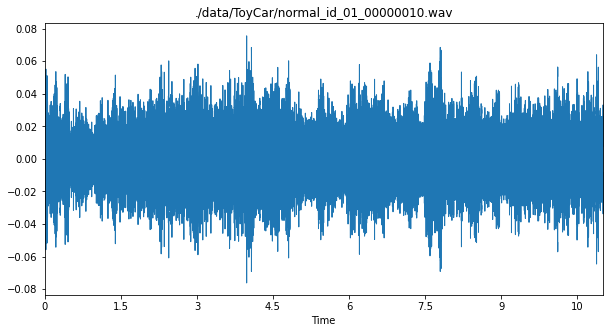

In [3]:
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
print(f'shape of signal is :{y.shape}')
print(f'signal is {y}')
print(f'sampling rate is {sr}hz')
print('waveform is like below.')
fig = plt.figure(figsize=(10, 5))
plt.title('./data/ToyCar/normal_id_01_00000010.wav')
librosa.display.waveplot(y,sr)

Then listen!

In [4]:
import IPython.display as ipd
ipd.Audio(data=y,rate=sr)

### **1-2. Acoustic feature : Spectrogram**

Even though some deep learning models use audio signals as input, many deep learning models use two-dimensional data. To make audio data into two-dimensional data, we can convert audio signals to spectrogram.

Do **STFT** on `y`. Use hanning window, with hop length and nfft defined as below.

You can use stft from `librosa` module.

Then follow below step.

1. get absolute value of stft.
2. use `amplitude_to_db` from `librosa` to convert in dB scale. here, use reference value as `np.max`.

    (`ref=np.max` means you will map maximum value of input matrix to 0dB)

For detail, follow below URL.

http://librosa.org/doc/main/generated/librosa.stft.html

In [5]:
hop_length = 512
n_fft = 2048
#=====================================================================#
Y = librosa.stft(y, window='hann', n_fft=n_fft, hop_length=hop_length)
D = librosa.amplitude_to_db(np.abs(Y), ref=np.max)
#=====================================================================#

See the shape of the data

You can see that the shape is (N/2 + 1, ⌈t*fs/hop_length⌉)

In [6]:
print(D.shape)

(1025, 344)


Plot the spectrogram

Here, I did not make blank, but see how to display spectrogram. `vmin` and `vmax` stands for limit of colorbar. For detail, follow below URL.

https://librosa.org/doc/main/auto_examples/plot_display.html

Text(0.5, 1.0, './data/ToyCar/normal_id_01_00000010.wav')

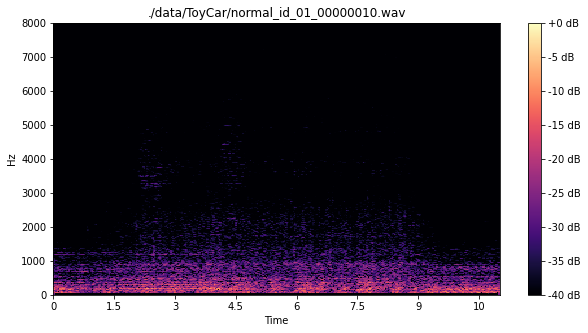

In [7]:
plt.figure(figsize=(10, 5))
img = librosa.display.specshow(D, y_axis='linear', x_axis='time', vmin=-40, vmax=0, hop_length=hop_length, sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('./data/ToyCar/normal_id_01_00000010.wav')

### **1-3. Acoustic feature : MelSpectrogram**

Some deep learning model uses Melspectrogram instead of spectrogram. Melspectrogram can be obtained by applying Mel filter bank on spectrogram. 

https://librosa.org/doc/main/generated/librosa.feature.melspectrogram.html

Follow below step.
1. Do STFT to `y` with given `nfft` and `hop_length`. (hanning window is default option, actually)

2. get |.|^2 value of 1.

3. Apply Mel filter bank by using `librosa.feature.melspectrogram`. You can see details in above URL. (Here, be careful to give input as power)

4. use `librosa.power_to_db`. This is different from Spectrgram since the input is power value.

In [8]:
hop_length = 512
n_fft = 2048
#=========================================================#
Y = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
D = np.abs(Y)**2 
S = librosa.feature.melspectrogram(S=D, sr=sr)
S_dB = librosa.power_to_db(S, ref=np.max)
#=========================================================#

See the shape of the data. 

Here the shape is (128, ⌈t*fs/hop_length⌉). 

128 is fixed by number of Mel bands. That number is defined by `librosa` inner function `librosa.filters.mel`. 

https://librosa.org/doc/main/generated/librosa.filters.mel.html#librosa.filters.mel



In [9]:
print(S_dB.shape)

(128, 344)


Plot the melspectrogram

You can see low frequency component in more detail than spectrogram.

Text(0.5, 1.0, './data/ToyCar/normal_id_01_00000010.wav')

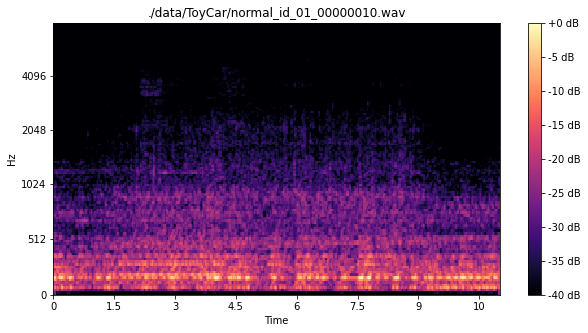

In [10]:
plt.figure(figsize=(10, 5))
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', vmin=-40, vmax=0, sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('./data/ToyCar/normal_id_01_00000010.wav')

### **2-1. Front end system : Restricting dB**

For some melspectrograms (or spectrograms), the dB range can vary too much. (Which means the lower bound of dB can be very low.) In this case, there is a risk that the model can focus on this low-powered part instead of high powered part, where machinery sound is placed. To avoid this, it can cut low dB by changing the parameter `top_db`.



Simply setting top_db option in `librosa.power_to_db`, you can restrict dB.

For detail, follow below URL.

https://librosa.org/doc/main/generated/librosa.power_to_db.html

Text(0.5, 1.0, './data/ToyCar/normal_id_01_00000010.wav')

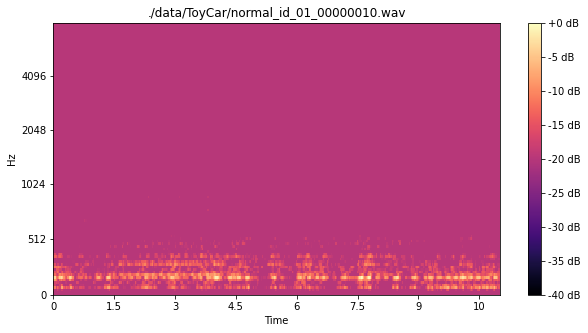

In [11]:
hop_length = 512
n_fft = 2048
Y = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
D = np.abs(Y)**2 
S = librosa.feature.melspectrogram(S=D, sr=sr) 
plt.figure(figsize=(10, 5))
#================================================================#
S_dB = librosa.power_to_db(S, ref=np.max, top_db = 20.0)
#================================================================#
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', vmin=-40, vmax=0, sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('./data/ToyCar/normal_id_01_00000010.wav')

###**2-2. Front end system : Normalization**

When recording machine conditions, noise can corrupt machinery sound, hindering the model from detecting anomalies. If we can reduce noise, the model can concentrate more on machinery sounds. Then how can we do that? 

In the real world, there are many stationary noises. Normalizing melspectrogram in the time axis can be considered to reduce these noises. Also, normalizing through the time axis does not reduce temporal signal.

In this case, to maximize the visualize effect, you will apply normalization on valve data, which is temporal.

※ Be sure to calculate the mean and standard deviation on all normal data.

In [12]:
import os
file_dirs = ['./data/valve/' + idir for idir in os.listdir('./data/valve') if 'normal' in idir]
all_S_dBs_ = []
hop_length = 512
n_fft = 2048
for isig in file_dirs:
  y, sr = librosa.load(isig, sr = 16000)
  Y = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
  D = np.abs(Y)**2 
  S = librosa.feature.melspectrogram(S=D, sr=sr) 
  S_dB = librosa.power_to_db(S, ref=np.max)
  all_S_dBs_.append(S_dB)
all_S_dBs = np.array(all_S_dBs_)
#===========================================================
S_mean = np.tile(np.mean(all_S_dBs, axis = (0,2)),(313,1)).T
S_var = np.tile(np.std(all_S_dBs, axis = (0,2)),(313,1)).T
#===========================================================
print(S_mean.shape)

(128, 313)


Using `S_mean` and `S_var` calculated above, normalize melspectrogram.

In [13]:
file_dir= './data/valve/normal_id_00_00000026.wav'
y, sr = librosa.load(file_dir, sr = None)
hop_length = 512
n_fft = 2048
Y = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
D = np.abs(Y)**2 
S = librosa.feature.melspectrogram(S=D, sr=sr) 
S_dB = librosa.power_to_db(S, ref=np.max)

# normalization
# ============================
S_norm = (S_dB - S_mean) / S_var
# ============================

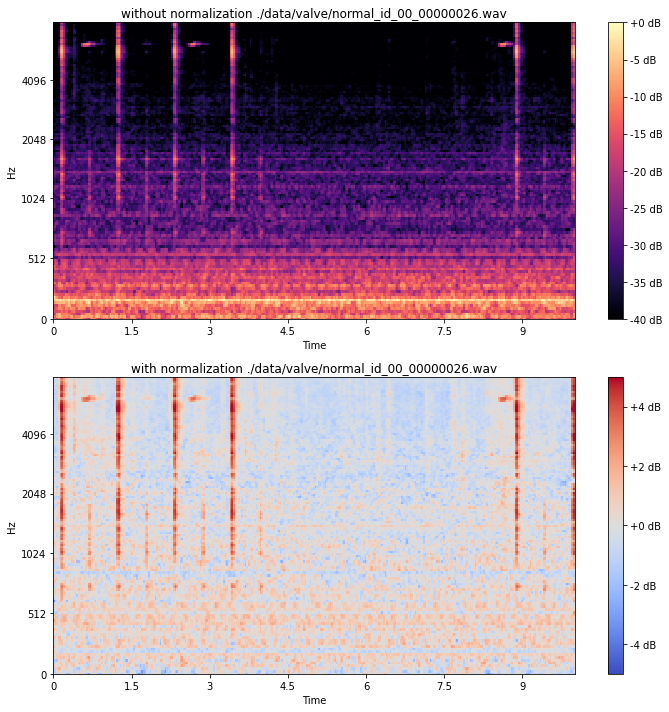

In [14]:
plt.figure(figsize=(10, 10))
plt.subplot(2,1,1)
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', vmin=-40, vmax=0, sr=sr)
plt.title('without normalization ./data/valve/normal_id_00_00000026.wav')
plt.tight_layout()
plt.colorbar(format='%+2.0f dB')
plt.subplot(2,1,2)
img = librosa.display.specshow(S_norm, x_axis='time', y_axis='mel', vmin=-5, vmax=5, sr=sr)
plt.title('with normalization ./data/valve/normal_id_00_00000026.wav')
plt.tight_layout()
plt.colorbar(format='%+2.0f dB')

In DL task, you can do normalization in this way, but also you can use batch normalization or layer normalization. Also, normalizing can be applied through not only time axis, but also entire melspectrogram or frequency axis.

### **2-3. Front end system : Filtering (scipy)**

To reduce specific frequency component to reduce noise, you can apply high pass filter (or band pass filter, low pass filter, and etc.) using `scipy.signal`.

In [15]:
file_dir= './data/ToyCar/normal_id_01_00000010.wav'
y, sr = librosa.load(file_dir, sr = None)
print(y.shape)
ipd.Audio(data=y,rate=sr)

(176000,)


We will use Butterworth filter here

Here order of the filter is 10 and critical frequency is 500Hz. We will apply high pass filter.

For convinicence, use `output = 'sos'` option.

Follow below URL.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html#scipy.signal.butter


And to apply given `y`

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.sosfilt.html

In [16]:
import scipy
from scipy import signal
#============================================
# 10th order butterworth filter
# critical frequency (cutoff frequency) 500hz
hpf = signal.butter(10,500,'high',fs=sr, output = 'sos')
yh = signal.sosfilt(hpf,y)
#============================================

In [17]:
ipd.Audio(data=yh,rate=sr)

let's see how it looks.

In [18]:
hop_length = 512
n_fft = 2048
Y = librosa.stft(yh, n_fft=n_fft, hop_length=hop_length)
D = np.abs(Y)**2 
S = librosa.feature.melspectrogram(S=D, sr=sr)
S_dB = librosa.power_to_db(S, ref=np.max)

Text(0.5, 1.0, './data/ToyCar/normal_id_01_00000010.wav')

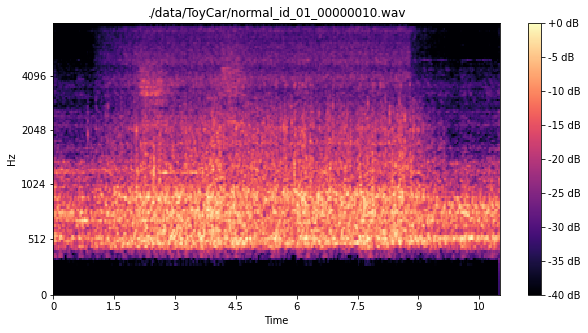

In [19]:
plt.figure(figsize=(10, 5))
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', vmin=-40, vmax=0, sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('./data/ToyCar/normal_id_01_00000010.wav')

###**2-4. Front end system : Filtering (pre emphasis / de emphasis in librosa)**

You can also apply filter to emphasize for making audio feature clear or dememphasize for making noise to be reduced.

You can use pre emphasis function, `librosa.effects.preemphasis`

This filter can be denoted as below formula.

𝒽[n] = 𝛿[n] - 0.97𝛿[n-1]


https://librosa.org/doc/main/generated/librosa.effects.preemphasis.html

In [20]:
y, sr = librosa.load(file_dir, sr = None)
#==================================#
y = librosa.effects.preemphasis(y)
#==================================#
print(y.shape)
ipd.Audio(data=y,rate=sr)

(176000,)


Text(0.5, 1.0, './data/ToyCar/normal_id_01_00000010.wav')

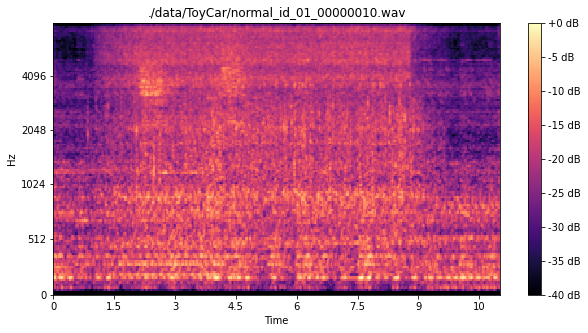

In [21]:
hop_length = 512
n_fft = 2048
Y = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
D = np.abs(Y)**2 
S = librosa.feature.melspectrogram(S=D, sr=sr)
S_dB = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(10, 5))
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', vmin=-40, vmax=0, sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('./data/ToyCar/normal_id_01_00000010.wav')

You can use de emphasis function, `librosa.effects.deemphasis`


This filter can be denoted as below formula.

𝒽[n] = 𝛿[n] + 0.97𝛿[n-1]


https://librosa.org/doc/main/generated/librosa.effects.deemphasis.html

In [22]:
y, sr = librosa.load(file_dir, sr = 16000)
#==================================#
y = librosa.effects.deemphasis(y)
#==================================#
print(y.shape)
ipd.Audio(data=y,rate=sr)

(176000,)


Text(0.5, 1.0, './data/ToyCar/normal_id_01_00000010.wav')

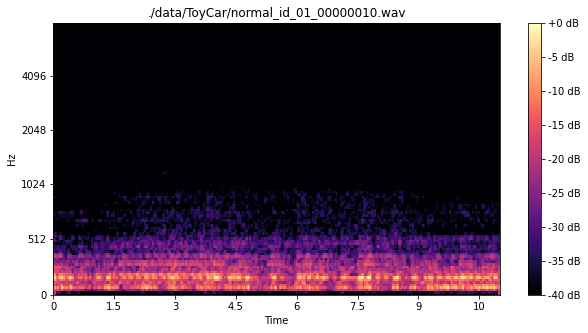

In [23]:
hop_length = 512
n_fft = 2048
Y = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
D = np.abs(Y)**2 
S = librosa.feature.melspectrogram(S=D, sr=sr)
S_dB = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(10, 5))
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', vmin=-40, vmax=0, sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('./data/ToyCar/normal_id_01_00000010.wav')

###**3-1. Data Augmentation : Adding noise** 

Using `librosa`, you can also do data augmentation. Adding noise is one of the commonly used methods for data augmentation.

In [24]:
file_dir= './data/ToyCar/normal_id_01_00000010.wav'
y, sr = librosa.load(file_dir, sr = None)
print(y.shape)
ipd.Audio(data=y,rate=sr)

(176000,)


Define `add_noise` function. What you will implement here can be denoted as below formula.

`noisy_data = org_data + nc * noise`

where noise is sampled from standard normal distribution.

For random noise implementation, use `numpy.random.randn`

https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html

In [25]:
def add_noise(org_data, nc):
    #================================================
    noise = np.random.randn(len(org_data))
    noisy_data = org_data + nc * noise
    #================================================
    noisy_data = noisy_data.astype(type(org_data[0]))
    return noisy_data

Here, using `add_noise` function, get noisy data below.

`org_data` is `y` and `nc` is `0.01`.

In [26]:
file_dir= './data/ToyCar/normal_id_01_00000010.wav'
y, sr = librosa.load(file_dir, sr = None)
#=======================
y = add_noise(y,0.01)
#=======================
ipd.Audio(data=y,rate=sr)

Text(0.5, 1.0, './data/ToyCar/normal_id_01_00000010.wav')

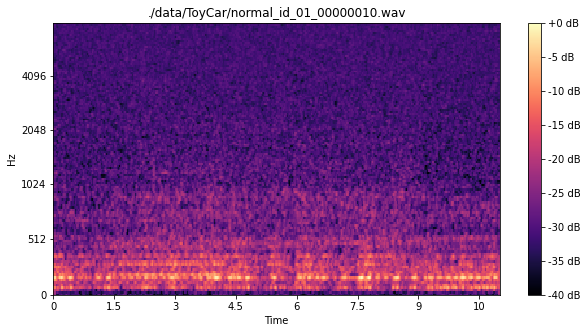

In [27]:
hop_length = 512
n_fft = 2048
Y = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
D = np.abs(Y)**2 
S = librosa.feature.melspectrogram(S=D, sr=sr)
S_dB = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(10, 5))
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', vmin=-40, vmax=0, sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('./data/ToyCar/normal_id_01_00000010.wav')

###**3-2. Data Augmentation : Time shift** 

Time shift is also commonly used data augmentation technique.

Here `org_data` is origianl data, `sr` is sampling rate and `max_dt` is maximum time that can be shifted.

What you have to implement here is time shifting by random variable Δ𝓉∈(`-max_dt`, `max_dt`) and Δ𝓉 ∈ 𝒵 (integer)

Be sure to multiply sr on Δ𝓉 to do actual shift on audio data.

You can use `numpy.randint` for random integer and `numpy.roll` for time shift.

https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html

https://numpy.org/doc/stable/reference/generated/numpy.roll.html


In [28]:
def time_shift(org_data, sr, max_dt):
    #==================================
    dt = np.random.randint(sr * max_dt)
    sgn = np.random.randint(0, 2)
    if sgn == 1:
        dt = -dt
    sft_data = np.roll(org_data, dt)
    #==================================
    return sft_data

Using `time_shift` function above, set `max_dt` value as `4` and apply on `y`.

In [29]:
file_dir= './data/ToyCar/normal_id_01_00000010.wav'
y, sr = librosa.load(file_dir, sr = None)
#=======================
y = time_shift(y,sr,4)
#=======================
ipd.Audio(data=y,rate=sr)

Text(0.5, 1.0, './data/ToyCar/normal_id_01_00000010.wav')

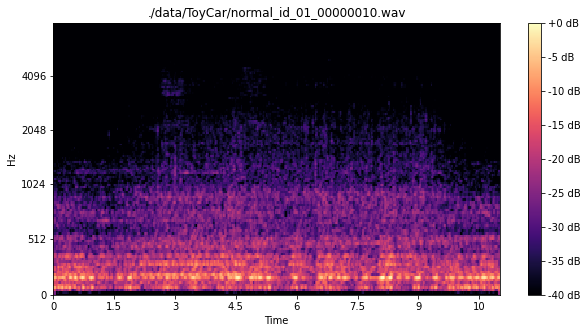

In [30]:
hop_length = 512
n_fft = 2048
Y = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
D = np.abs(Y)**2 
S = librosa.feature.melspectrogram(S=D, sr=sr)
S_dB = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(10, 5))
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', vmin=-40, vmax=0, sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('./data/ToyCar/normal_id_01_00000010.wav')

###**3-3. Data Augmentation : Pitch shift** 

Pitch shift can be used as data augmentation.

For pitch shift, you can use `librosa.effects.pitch_shift`.

http://librosa.org/doc/main/generated/librosa.effects.pitch_shift.html

Here set `n_steps` as `2`.

In [31]:
file_dir= './data/ToyCar/normal_id_01_00000010.wav'
y, sr = librosa.load(file_dir, sr = 16000)
#=========================================
y = librosa.effects.pitch_shift(y, sr, 2)
#=========================================
ipd.Audio(data=y,rate=sr)

Text(0.5, 1.0, './data/ToyCar/normal_id_01_00000010.wav')

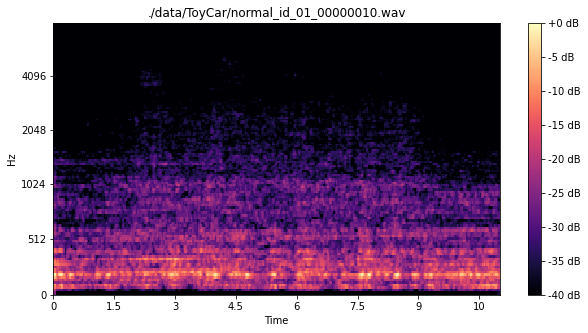

In [32]:
hop_length = 512
n_fft = 2048
Y = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
D = np.abs(Y)**2 
S = librosa.feature.melspectrogram(S=D, sr=sr)
S_dB = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(10, 5))
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', vmin=-40, vmax=0, sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('./data/ToyCar/normal_id_01_00000010.wav')